In [1]:
using LinearAlgebra
using Polynomials
using Plots
using DataFrames

# Задание узлов и значений функции 

In [7]:
x=[0; π/6; π/4; π/3; π/2]
y=[1; √3/2; √2/2; 1/2; 0]
x_wave=[π/14;(5/12)*π; (7/24)*π]

3-element Vector{Float64}:
 0.2243994752564138
 1.3089969389957472
 0.9162978572970231

# Вычисление значений функции с помощью барицентрической формы полинома Лагранжа


In [8]:
A_k = []
for k ∈ 1:size(x)[1]
    push!(A_k,1/fromroots(x[[1:k-1;k+1:end]])(x[k]))
end

In [9]:
f_x=[]


for k ∈ 1:size(x_wave)[1]
    num=0
    denom=0
    for i ∈ 1:size(x)[1]
       num+=A_k[i]*(y[i]/(x_wave[k]-x[i]))
        denom += A_k[i]/(x_wave[k]-x[i])
    end
    push!(f_x,num/denom)
end

print(f_x)

Any[0.9751454102989172, 0.25858790872102555, 0.6087853256082041]

# Вычисления в встроенной функции

In [10]:
x_wave |> x->cos.(x) |> print

[0.9749279121818236, 0.25881904510252074, 0.6087614290087207]

# Абсолютная погрешность интерполирования с помощью барицентрической формы полинома Лагранжа

In [13]:

abs.(f_x[3]-cos(x_wave[3]))

2.3896599483430592e-5

# Лабораторная работа 4
Для функции f(x)=cos(x) в узлах B известны значения f(x_k). С помощбю схемы Эйткена найти значения f(x_wave). Сравнить результаты интерполирования с предыдущей ЛР.

In [2]:
function poly_mrx2x2_det(X)
    X[1,1]*X[2,2]-X[1,2]*X[2,1]
end

poly_mrx2x2_det (generic function with 1 method)

In [5]:
x=[0; π/6; π/4; π/3; π/2]
x_wave=[π/12;(5/12)*π; (7/24)*π]

y=[]
for k ∈ 1:size(x)[1]
    push!(y,cos(x[k]))
end

y

5-element Vector{Any}:
 1.0
 0.8660254037844387
 0.7071067811865476
 0.5000000000000001
 6.123233995736766e-17

In [4]:
x

5-element Vector{Float64}:
 0.0
 0.5235987755982988
 0.7853981633974483
 1.0471975511965976
 1.5707963267948966

In [209]:
X_Xi=[]

for k ∈ 1:size(x)[1]
    push!(X_Xi,-fromroots([x[k]]))
end

X_Xi

5-element Vector{Any}:
 Polynomial(-0.0 - 1.0*x)
 Polynomial(0.5235987755982988 - 1.0*x)
 Polynomial(0.7853981633974483 - 1.0*x)
 Polynomial(1.0471975511965976 - 1.0*x)
 Polynomial(1.5707963267948966 - 1.0*x)

In [315]:
L_2=[]

for i ∈ 1:4
    M=[y[i] X_Xi[i];y[i+1] X_Xi[i+1]]
    push!(L_2,1/X_Xi[i+1](x[i])*poly_mrx2x2_det(M))
end
    
L_2

4-element Vector{Any}:
 Polynomial(1.0 - 0.2558726308373678*x)
 Polynomial(1.183862648980221 - 0.607024424059434*x)
 Polynomial(1.32842712474619 - 0.7910896313685742*x)
 Polynomial(1.5 - 0.9549296585513719*x)

In [316]:
L_3=[]

for i ∈ 1:3
    M=[L_2[i] X_Xi[i];L_2[i+1] X_Xi[i+2]]
    push!(L_3,1/X_Xi[i+2](x[i])*poly_mrx2x2_det(M))
end

L_3

3-element Vector{Any}:
 Polynomial(1.0 - 0.021771435355990115*x - 0.44710034933499965*x^2)
 Polynomial(1.039298173214252 - 0.1468614057865838*x - 0.3515386511338096*x^2)
 Polynomial(1.1568542494923804 - 0.40879623460871295*x - 0.208607601619622*x^2)

In [317]:
L_4=[]

for i ∈ 1:2
    M=[L_3[i] X_Xi[i];L_3[i+1] X_Xi[i+3]]
    push!(L_4,1/X_Xi[i+3](x[i])*poly_mrx2x2_det(M))
end

L_4

2-element Vector{Any}:
 Polynomial(1.0 + 0.015755555773188257*x - 0.5665524720864876*x^2 + 0.09125469983385168*x^3)
 Polynomial(0.9805201350751879 + 0.09636379240539282*x - 0.6731335125407313*x^2 + 0.1364890983089724*x^3)

In [318]:
L_5=[] 

M=[L_4[1] X_Xi[1];L_4[2] X_Xi[end]]
L_5=1/X_Xi[end](x[1])*poly_mrx2x2_det(M)

L_5

Polynomial(1.0 + 0.003354288599003126*x - 0.5152356748307414*x^2 + 0.023403102121171106*x^3 + 0.02879711246041583*x^4)

## Сравним результаты предыдущей лабораторной с значениями полинома четвёртой степени, полученного в этой лабораторной

In [217]:
poly_values_lb3=f_x
poly_values_lb4=(x_wave |> x->L_5.(x))

println(poly_values_lb3)
println(poly_values_lb4)

error=abs.(poly_values_lb3-poly_values_lb4)

Any[0.9751454102989172, 0.25858790872102555, 0.6087853256082041]
[0.9661196634515767, 0.2585879087210282, 0.608785325608204]


3-element Vector{Float64}:
 0.009025746847340477
 2.6645352591003757e-15
 1.1102230246251565e-16

## Вывод графиков системной функции cos(x), интерполяционного полинома и значений системной функции в данных точках

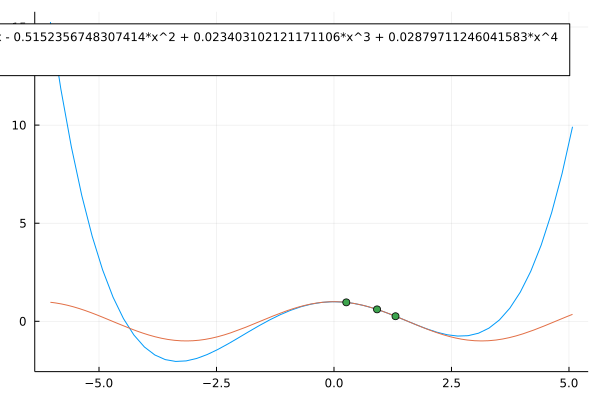

In [218]:
plot(L_5)
plot!(cos)
scatter!(([x_wave],[x_wave |> x->cos.(x)]))

In [319]:
L_2=[fill(missing,5-size(L_2)[1]); L_2]

L_3=[fill(missing,5-size(L_3)[1]); L_3]

L_4=[fill(missing,5-size(L_4)[1]); L_4]

L_5=[L_5]
L_5=[fill(missing,5-size(L_5)[1]); L_5]

5-element Vector{Union{Missing, Polynomial{Float64}}}:
 missing
 missing
 missing
 missing
 Polynomial(1.0 + 0.003354288599003126*x - 0.5152356748307414*x^2 + 0.023403102121171106*x^3 + 0.02879711246041583*x^4)

# Таблицы значений

In [321]:
df = DataFrame(X = x, Fx = y,Xi=X_Xi,L2=L_2,L3=L_3)

,X,Fx,Xi,L2,L3
,Float64,Any,Any,Any,Any
1,0.0,1.0,-0.0 - 1.0*x,missing,missing
2,0.523599,0.866025,0.523599 - 1.0*x,1.0 - 0.255873*x,missing
3,0.785398,0.707107,0.785398 - 1.0*x,1.18386 - 0.607024*x,1.0 - 0.0217714*x - 0.4471*x^2
4,1.0472,0.5,1.0472 - 1.0*x,1.32843 - 0.79109*x,1.0393 - 0.146861*x - 0.351539*x^2
5,1.5708,6.12323e-17,1.5708 - 1.0*x,1.5 - 0.95493*x,1.15685 - 0.408796*x - 0.208608*x^2


In [322]:
df2=DataFrame(L4=L_4,L5=L_5)

,L4,L5
,Any,Polynom…?
1,missing,missing
2,missing,missing
3,missing,missing
4,1.0 + 0.0157556*x - 0.566552*x^2 + 0.0912547*x^3,missing
5,0.98052 + 0.0963638*x - 0.673134*x^2 + 0.136489*x^3,1.0 + 0.00335429*x - 0.515236*x^2 + 0.0234031*x^3 + 0.0287971*x^4


In [384]:
L_2x1=[]
for i ∈ 2:size(L_2)[1]
   push!(L_2x1,L_2[i](x_wave[1]))
end

L_3x1=[]
for i ∈ 3:size(L_3)[1]
   push!(L_3x1,L_3[i](x_wave[1]))
end

L_4x1=[]
for i ∈ 4:size(L_4)[1]
   push!(L_4x1,L_4[i](x_wave[1]))
end

L_5x1=[L_5[5](x_wave[1])]

1-element Vector{Float64}:
 0.9661196634515767

In [385]:
L_2x1=[fill(missing,5-size(L_2x1)[1]); L_2x1]

L_3x1=[fill(missing,5-size(L_3x1)[1]); L_3x1]

L_4x1=[fill(missing,5-size(L_4x1)[1]); L_4x1]

L_5x1=[fill(missing,5-size(L_5x1)[1]); L_5x1]

5-element Vector{Union{Missing, Float64}}:
  missing
  missing
  missing
  missing
 0.9661196634515767

## Таблицы значений

### x=π/12

In [387]:
df=DataFrame(X = x, Fx = y,Xi=X_Xi,L2=L_2x1,L3=L_3x1,L4=L_4x1,L5=L_5x1)

,X,Fx,Xi,L2,L3,L4,L5
,Float64,Any,Any,Any,Any,Any,Float64?
1,0.0,1.0,-0.0 - 1.0*x,missing,missing,missing,missing
2,0.523599,0.866025,0.523599 - 1.0*x,0.933013,missing,missing,missing
3,0.785398,0.707107,0.785398 - 1.0*x,1.02494,0.963656,missing,missing
4,1.0472,0.5,1.0472 - 1.0*x,1.12132,0.976756,0.966931,missing
5,1.5708,6.12323e-17,1.5708 - 1.0*x,1.25,1.03553,0.962061,0.96612


In [395]:
L_2x2=[]
for i ∈ 2:size(L_2)[1]
   push!(L_2x2,L_2[i](x_wave[2]))
end

L_3x2=[]
for i ∈ 3:size(L_3)[1]
   push!(L_3x2,L_3[i](x_wave[2]))
end

L_4x2=[]
for i ∈ 4:size(L_4)[1]
   push!(L_4x2,L_4[i](x_wave[2]))
end

L_5x2=[L_5[5](x_wave[2])]

1-element Vector{Float64}:
 0.2585879087210282

In [396]:
L_2x2=[fill(missing,5-size(L_2x2)[1]); L_2x2]

L_3x2=[fill(missing,5-size(L_3x2)[1]); L_3x2]

L_4x2=[fill(missing,5-size(L_4x2)[1]); L_4x2]

L_5x2=[fill(missing,5-size(L_5x2)[1]); L_5x2]

5-element Vector{Union{Missing, Float64}}:
  missing
  missing
  missing
  missing
 0.2585879087210282

### x=5/12π 

In [397]:
df=DataFrame(X = x, Fx = y,Xi=X_Xi,L2=L_2x2,L3=L_3x2,L4=L_4x2,L5=L_5x2)

,X,Fx,Xi,L2,L3,L4,L5
,Float64,Any,Any,Any,Any,Any,Float64?
1,0.0,1.0,-0.0 - 1.0*x,missing,missing,missing,missing
2,0.523599,0.866025,0.523599 - 1.0*x,0.665064,missing,missing,missing
3,0.785398,0.707107,0.785398 - 1.0*x,0.38927,0.205407,missing,missing
4,1.0472,0.5,1.0472 - 1.0*x,0.292893,0.244705,0.25453,missing
5,1.5708,6.12323e-17,1.5708 - 1.0*x,0.25,0.264298,0.2594,0.258588


In [398]:
L_2x3=[]
for i ∈ 2:size(L_2)[1]
   push!(L_2x3,L_2[i](x_wave[3]))
end

L_3x3=[]
for i ∈ 3:size(L_3)[1]
   push!(L_3x3,L_3[i](x_wave[3]))
end

L_4x3=[]
for i ∈ 4:size(L_4)[1]
   push!(L_4x3,L_4[i](x_wave[3]))
end

L_5x3=[L_5[5](x_wave[3])]

1-element Vector{Float64}:
 0.608785325608204

In [399]:
L_2x3=[fill(missing,5-size(L_2x3)[1]); L_2x3]

L_3x3=[fill(missing,5-size(L_3x3)[1]); L_3x3]

L_4x3=[fill(missing,5-size(L_4x3)[1]); L_4x3]

L_5x3=[fill(missing,5-size(L_5x3)[1]); L_5x3]

5-element Vector{Union{Missing, Float64}}:
  missing
  missing
  missing
  missing
 0.608785325608204

### x= 7/24 π

In [401]:
df=DataFrame(X = x, Fx = y,Xi=X_Xi,L2=L_2x3,L3=L_3x3,L4=L_4x3,L5=L_5x3)

,X,Fx,Xi,L2,L3,L4,L5
,Float64,Any,Any,Any,Any,Any,Float64?
1,0.0,1.0,-0.0 - 1.0*x,missing,missing,missing,missing
2,0.523599,0.866025,0.523599 - 1.0*x,0.765544,missing,missing,missing
3,0.785398,0.707107,0.785398 - 1.0*x,0.627647,0.604665,missing,missing
4,1.0472,0.5,1.0472 - 1.0*x,0.603553,0.609577,0.608963,missing
5,1.5708,6.12323e-17,1.5708 - 1.0*x,0.625,0.607128,0.608659,0.608785
